#Titanic Kaggle Study

###1. Read Data

In [345]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv('kaggle/Titanic/data/train.csv')
test = pd.read_csv('kaggle/Titanic/data/test.csv')

###2. checkData

In [346]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


##Age, Cabin, Embarked에 NAN이 있다. 
####Pclass 탄 등급, SibSP 같이 탄 사람, Parch 같이탄 부모님, 자식, Fare가격, Cabin 탄 공간, Embarked: 탑승한 공간

In [347]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. data enginnering

In [348]:
def makingBar(Feature):
    survivedData = train[train['Survived'] == 1][Feature].value_counts()
    dieData = train[train['Survived'] == 0][Feature].value_counts()
    df = pd.DataFrame([survivedData, dieData])
    df.index = ['Survived', 'Die']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))

In [349]:
train_test_data = [train, test]

###3-2. sex Data 2 vector

In [350]:
sexMapping = {'male': 0, 'female': 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sexMapping)

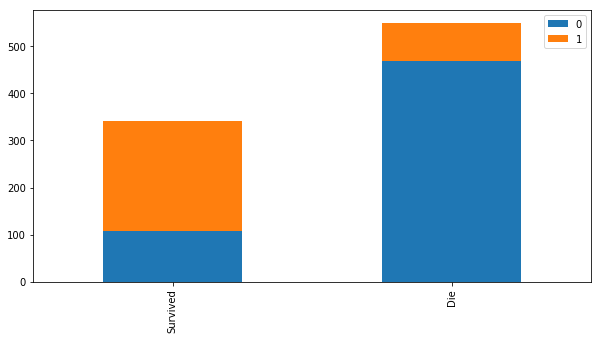

In [352]:
# 1==female, 0==male 
makingBar('Sex')

In [353]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [354]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr


In [355]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Ms            1
Capt          1
Lady          1
Mme           1
Don           1
Countess      1
Jonkheer      1
Sir           1
Name: Title, dtype: int64

In [356]:
mappingTitle = {
    'Mr':0, 'Miss':1, 'Mrs':2, 
    'Master':3, 'Dr':3, 'Rev':3, 'Col':3, 'Major':3, 'Mlle':3, 'Ms':3, 'Capt':3, 'Jonkheer':3, 
    'Mme':3, 'Sir':3, 'Lady':3, 'Countess':3, 'Don':3
}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(mappingTitle)

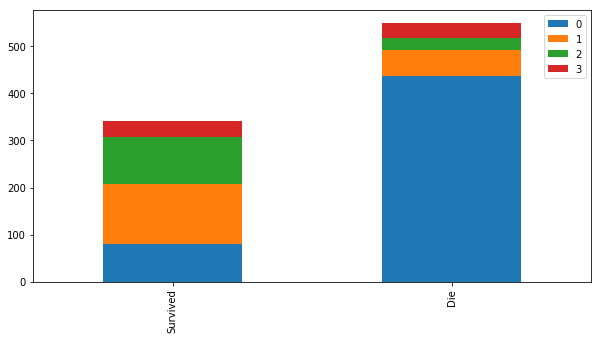

In [358]:
makingBar('Title')

In [359]:
#drop Name
train = train.drop(columns='Name')
test = test.drop(columns='Name')

In [360]:
train['Age'].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test['Age'].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

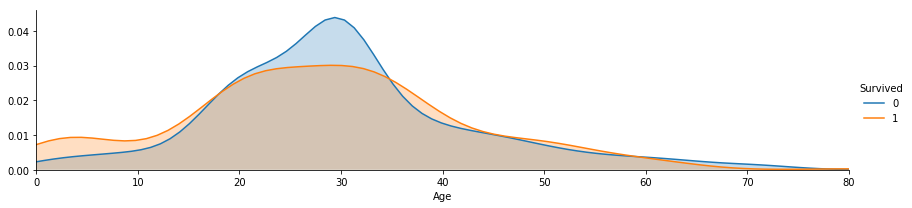

In [362]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

(0, 20)

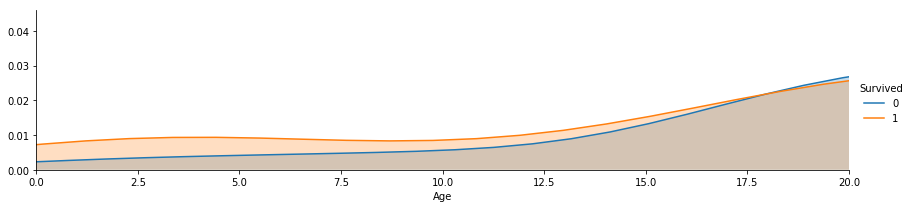

In [364]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20) # 0 ~ 16

(20, 40)

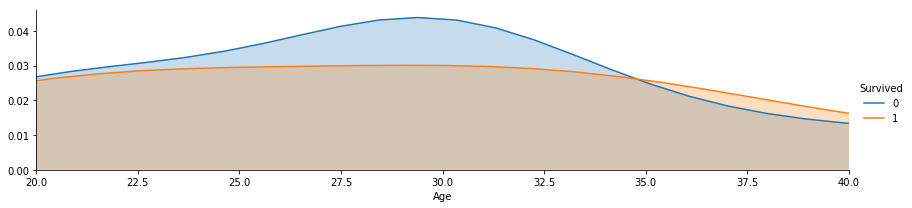

In [365]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 40)#16 ~ 35

(40, 60)

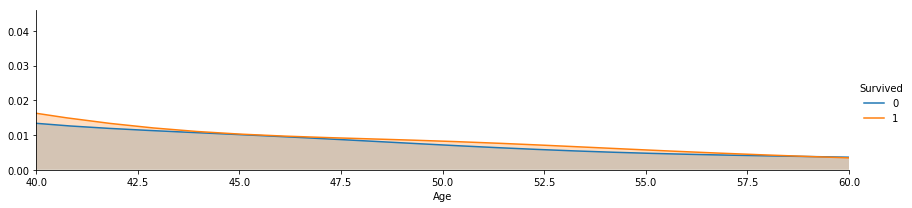

In [367]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)#35 ~ 47

(60, 80)

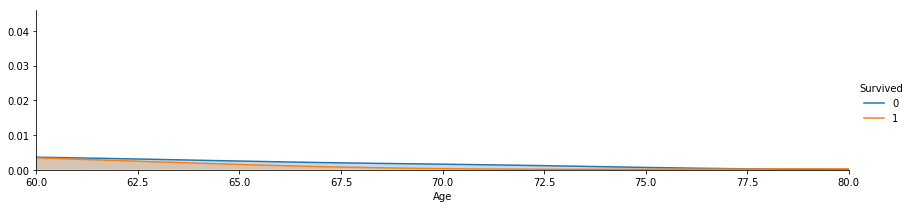

In [370]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60, 80)#47 ~ 60 60 ~

In [371]:
train_test_data = [train, test]
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 35), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 47), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 47) & (dataset['Age'] <= 60), 'Age'] = 3
    dataset.loc[dataset['Age'] > 60, 'Age'] = 4

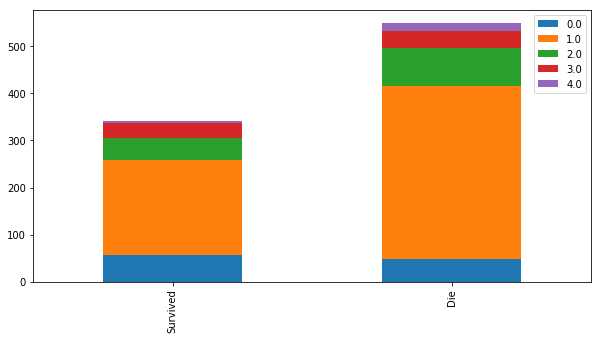

In [372]:
makingBar('Age')

In [373]:
train['Cabin'] = train['Cabin'].str[:1]
test['Cabin'] = test['Cabin'].str[:1]

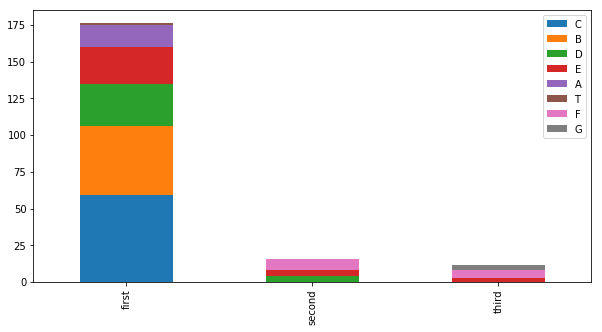

In [374]:
Pclass1 = train[train['Pclass'] == 1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Cabin'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['first', 'second', 'third']
df.plot(kind='bar', stacked=True, figsize=(10, 5))

In [375]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2,
                 "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [376]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,1.0,0,0,330911,7.8292,2.0,Q,0.0
1,893,3,1,2.0,1,0,363272,7.0000,2.0,S,2.0
2,894,2,0,4.0,0,0,240276,9.6875,2.0,Q,0.0
3,895,3,0,1.0,0,0,315154,8.6625,2.0,S,0.0
4,896,3,1,1.0,1,1,3101298,12.2875,2.0,S,2.0


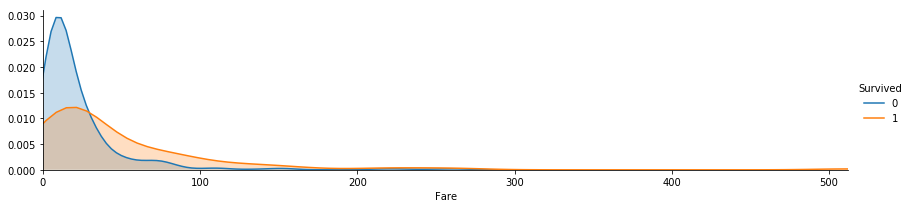

In [377]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

(0, 30)

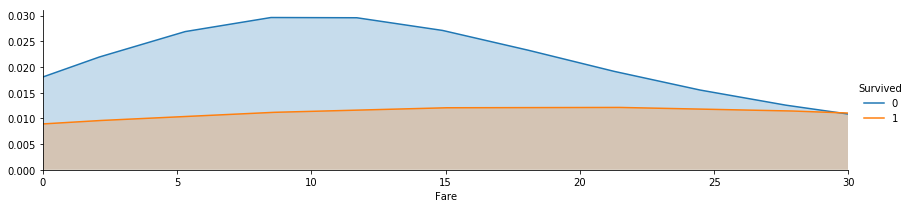

In [378]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30) #0 ~ 30 

(30, 60)

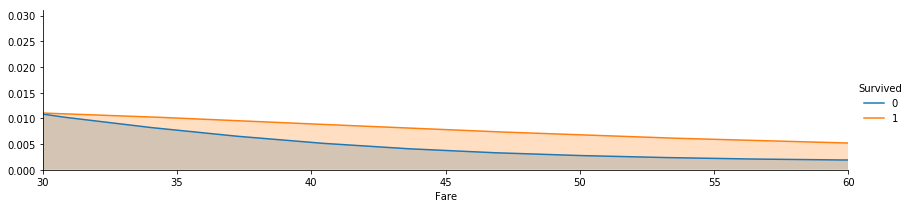

In [379]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(30, 60) #0 ~ 30 

(90, 120)

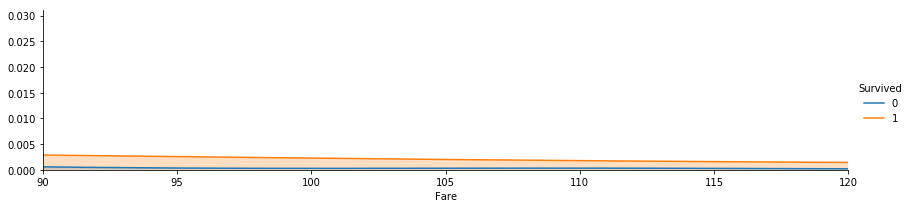

In [380]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(90, 120) #0 ~ 30

In [381]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 30, 'Fare'] = 0
    dataset.loc[dataset['Fare'] > 30, 'Fare'] = 1

In [382]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,1.0,0,0,330911,0.0,2.0,Q,0.0
1,893,3,1,2.0,1,0,363272,0.0,2.0,S,2.0
2,894,2,0,4.0,0,0,240276,0.0,2.0,Q,0.0
3,895,3,0,1.0,0,0,315154,0.0,2.0,S,0.0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,S,2.0
5,897,3,0,0.0,0,0,7538,0.0,2.0,S,0.0
6,898,3,1,1.0,0,0,330972,0.0,2.0,Q,1.0
7,899,2,0,1.0,1,1,248738,0.0,2.0,S,0.0
8,900,3,1,1.0,0,0,2657,0.0,2.0,C,2.0
9,901,3,0,1.0,2,0,A/4 48871,0.0,2.0,S,0.0


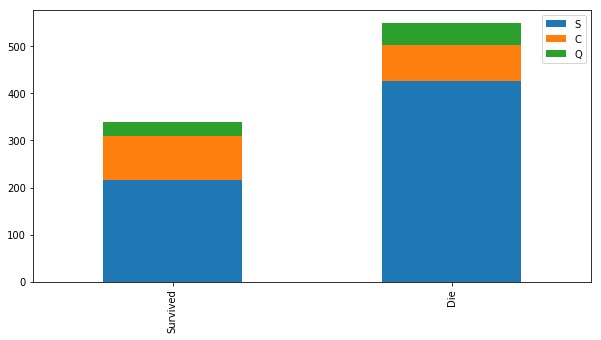

In [383]:
makingBar('Embarked')

In [384]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [385]:
EmbarkedMapping = {'S':0, 'C':1, 'Q':2}
train['Embarked'] = train['Embarked'].map(EmbarkedMapping)
test['Embarked'] = test['Embarked'].map(EmbarkedMapping)

In [386]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null float64
Embarked       891 non-null int64
Title          891 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 83.6+ KB


In [387]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,2.0,1,0,PC 17599,1.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,1.0,1,0,113803,1.0,0.8,0,2
4,5,0,3,0,1.0,0,0,373450,0.0,2.0,0,0


In [388]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [389]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,2
1,2,1,1,1,2.0,1,0,PC 17599,1.0,0.8,1,2,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,1
3,4,1,1,1,1.0,1,0,113803,1.0,0.8,0,2,2
4,5,0,3,0,1.0,0,0,373450,0.0,2.0,0,0,1


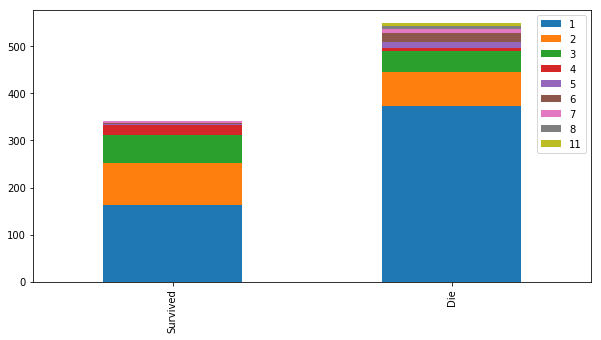

In [390]:
makingBar('FamilySize')

In [391]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,1.0,0,0,330911,0.0,2.0,2,0.0,2
1,893,3,1,2.0,1,0,363272,0.0,2.0,0,2.0,2
2,894,2,0,4.0,0,0,240276,0.0,2.0,2,0.0,1
3,895,3,0,1.0,0,0,315154,0.0,2.0,0,0.0,2
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,2.0,1
5,897,3,0,0.0,0,0,7538,0.0,2.0,0,0.0,1
6,898,3,1,1.0,0,0,330972,0.0,2.0,2,1.0,1
7,899,2,0,1.0,1,1,248738,0.0,2.0,0,0.0,5
8,900,3,1,1.0,0,0,2657,0.0,2.0,1,2.0,3
9,901,3,0,1.0,2,0,A/4 48871,0.0,2.0,0,0.0,2


(0.0, 11.0)

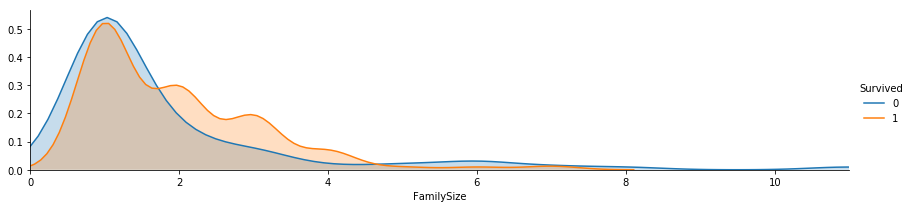

In [392]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim()

In [393]:
family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 
                  7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}
for dataset in train_test_data:
    dataset["FamilySize"] = dataset["FamilySize"].map(family_mapping)

In [394]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,2.0,1,0,PC 17599,1.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,1.0,1,0,113803,1.0,0.8,0,2,0.4
4,5,0,3,0,1.0,0,0,373450,0.0,2.0,0,0,0.0


In [395]:
train.drop(['PassengerId', 'SibSp', 'Parch', 'Ticket'], inplace=True, axis=1)
test.drop(['SibSp', 'Parch', 'Ticket'], inplace=True, axis=1)

In [397]:
train.info()
answer = train['Survived']
train.drop(['Survived'], inplace=True, axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


KeyError: 'Survived'

In [406]:

from sklearn.svm import SVC
from sklearn import metrics, model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

In [407]:
params = [
    {"C": [1, 10, 100, 1000], "kernel": ["linear"]},
    {"C": [1, 10, 100, 1000], "kernel": ["rbf"], "gamma": [0.001, 0.0001, 0.01, 0.1]}
]

clf = GridSearchCV(SVC(), params, n_jobs=-1)
clf.fit(train, answer)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001, 0.01, 0.1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [410]:
test_data = test.drop('PassengerId', axis=1).copy()
prediction = clf.predict(test_data)

In [411]:
submission = pd.DataFrame(
    {
        "PassengerId":test["PassengerId"],
        "Survived":prediction
     }
)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [412]:
submission.to_csv('submission.csv', index=False)

In [413]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
